<a href="https://colab.research.google.com/github/Ttm2025/test/blob/main/VAz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from IPython.display import display, Math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def add(x, y): return ['+', x, y]
def sub(x, y): return ['-', x, y]
def mul(x, y): return ['*', x, y]
def div(x, y): return ['/', x, y]
def power(x, y): return ['^', x, y]
def negative(x): return ['~', x]
def abs_(x): return ['abs', x]
def sin_(x): return ['sin', x]
def cos_(x): return ['cos', x]
def tan_(x): return ['tan', x]
def arcsin_(x): return ['arcsin', x]
def arccos_(x): return ['arccos', x]
def arctan_(x): return ['arctan', x]
def sinh_(x): return ['sinh', x]
def cosh_(x): return ['cosh', x]
def tanh_(x): return ['tanh', x]
def arcsinh_(x): return ['arcsinh', x]
def arccosh_(x): return ['arccosh', x]
def arctanh_(x): return ['arctanh', x]
def sqrt_(x): return ['sqrt', x]
def ln_(x):  return ['ln',x]
def lg_(x):  return ['lg',x]



def fix(x):
  if isinstance(x, Expression):
    return x
  return Expression(x)
def abs(x):
  return Expression(abs_(fix(x).T))
def sin(x):
  return Expression(sin_(fix(x).T))
def cos(x):
  return Expression(cos_(fix(x).T))
def tan (x):
  return Expression(tan_(fix(x).T))
def arcsin(x):
  return Expression(arcsin_(fix(x).T))
def arccos(x):
  return Expression(arccos_(fix(x).T))
def arctan (x):
  return Expression(arctan_(fix(x).T))
def sinh(x):
  return Expression(sinh_(fix(x).T))
def cosh(x):
  return Expression(cosh_(fix(x).T))
def tanh (x):
  return Expression(tanh_(fix(x).T))
def arcsinh(x):
  return Expression(arcsinh_(fix(x).T))
def arccosh(x):
  return Expression(arccosh_(fix(x).T))
def arctanh (x):
  return Expression(arctanh_(fix(x).T))
def sqrt(x):
  return Expression(sqrt_(fix(x).T))
def ln(x):
  return Expression(ln_(fix(x).T))
def lg(x):
  return Expression(lg_(fix(x).T))

def show(x):
  display(Math(latex(x)))

def enclose(x):
  return f'\\left( {x} \\right)'

def latex(x):
  if isinstance(x, Expression):
    return latex(x.T)
  if isinstance(x, (int, str)):
    return str(x)
  op = x[0]
  if op in '+-*/^g':
    l, r = latex(x[1]), latex(x[2])
    if op == '+':
      return f'{l} + {r}'
    if op == '-':
      return f'{l} - {r}'
    if op == '*':
      return f'{l} \\cdot {r}'
    if op == '/':
      return f'\\dfrac{{{l}}}{{{r}}}'
    if op == 'g':
      return f'\sqrt [l]{{{r}}}'
    if op == '^':
      if isinstance(x[1], list):
        l = enclose(l)
      return f'{{{l}}}^{{{r}}}'
  else: 
    a = latex(x[1])
    if op == '~':
      return f'- {a}'
    if op == 'abs':
      return f'\\mid {a}\mid'
    if op == 'sin':
      return f'\\sin {a}'
    if op == 'cos':
      return f'\\cos {a}'
    if op == 'tan':
      return f'\\tan {{{a}}}'
    if op == 'arcsin':
      return f'\\arcsin {a}'
    if op == 'arccos':
      return f'\\arccos {a}'
    if op == 'arctan':
      return f'\\arctan {{{a}}}'
    if op == 'sinh':
      return f'\\sinh {a}'
    if op == 'cosh':
      return f'\\cosh {a}'
    if op == 'tanh':
      return f'\\tanh {{{a}}}'
    if op == 'arcsinh':
      return f'\\arcsinh {a}'
    if op == 'arccosh':
      return f'\\arccosh {a}'
    if op == 'arctanh':
      return f'\\arctanh {{{a}}}'
    if op == 'sqrt':
      return f'\\sqrt{{{a}}}'
    if op == 'ln':
      return f'\\ln{{{a}}}'
    if op == 'lg':
      return f'\\lg{{{a}}}'

def symbols(s):
  S = s.split()
  if len(S) == 1:
    return Expression(s)
  return (Expression(i) for i in S)

def evalf(x, arg = {}):
  if isinstance(x, Expression):
    if isinstance(arg, dict):
      arg = {i.T: arg[i] for i in arg}
    else:
      arg = {'$': arg}
    return evalf(x.T, arg)
  if isinstance(x, int):
    return x
  if isinstance(x, str):
    if x in arg:
      return arg[x]
    return arg['$']
  op = x[0]
  if op in '+-*/^g':
    l, r = evalf(x[1], arg), evalf(x[2], arg)
    if op == '+':
      return l + r
    if op == '-':
      return l - r
    if op == '*':
      return l * r
    if op == '/':
      return l / r
    if op == '^':
      return l ** r
    if op == 'g':
      return r ** (1/l)
  
  else:
    a = evalf(x[1], arg)
    if op == '~':
      return - a
    if op == 'abs':
      return np.absolute(a)
    if op == 'sin':
      return np.sin(a)
    if op == 'cos':
      return np.cos(a)
    if op == 'tan':
      return np.tan(a)
    if op == 'arcsin':
      return np.arcsin(a)
    if op == 'arccos':
      return np.arccos(a)
    if op == 'arctan':
      return np.arctan(a)
    if op == 'sinh':
      return np.sinh(a)
    if op == 'cosh':
      return np.cosh(a)
    if op == 'tanh':
      return np.tanh(a)
    if op == 'arcsinh':
      return np.arcsinh(a)
    if op == 'arccosh':
      return np.arccosh(a)
    if op == 'arctanh':
      return np.arctanh(a)
    if op == 'sqrt':
      return np.sqrt(a)
    if op =='ln':
      return np.log(a)
    if op =='lg':
      return np.log10(a)
  return None

def plot(y, x):
  X = np.linspace(x[1], x[2], 1000)
  Y = evalf(y, {x[0]: X})
  plt.plot(X, Y)

class Expression:
  def __init__(self, x):
    self.T = x
  def __add__(self, x):
    return Expression(add(self.T, fix(x).T))
  def __radd__(self, x):
    return Expression(add(fix(x).T, self.T))
  def __sub__(self, x):
    return Expression(sub(self.T, fix(x).T))
  def __rsub__(self, x):
    return Expression(sub(fix(x).T, self.T))
  def __mul__(self, x):
    return Expression(mul(self.T, fix(x).T))
  def __rmul__(self, x):
    return Expression(mul(fix(x).T, self.T))
  def __truediv__(self, x):
    return Expression(div(self.T, fix(x).T))
  def __rtruediv__(self, x):
    return Expression(div(fix(x).T, self.T))
  def __pow__(self, x):
    return Expression(power(self.T, fix(x).T))
  def __rpow__(self, x):
    return Expression(power(fix(x).T, self.T))
  def __neg__(self):
    return Expression(negative(self.T)) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

12.0


<IPython.core.display.Math object>

8.0


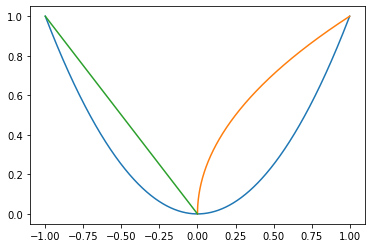

In [19]:
x = Expression('x')
z=2*x**3/4-5
show(z)

show(abs(x+7))
show(sqrt(x))
show(cos(x))
show(sin(x))
show(tan(x))
show(arccos(x))
show(arcsin(x))
show(arctan(x))
show(cosh(x))
show(sinh(x))
show(tanh(x))
show(arccosh(x))
show(arcsinh(x))
show(arctanh(x))

show(ln(x))
show(lg(x))

z=sqrt(121)+sqrt(121)-10
show(z)
print(evalf(z))
z=(abs(sqrt(121)+sqrt(121)-30))
show(z)
print(evalf(z))
plot(x ** 2, (x, -1, 1))
plot(sqrt(x),(x, 1, 0))
plot(-x,(x, -1, 0))